In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


     ---------------------------------------- 0.0/48.7 kB ? eta -:--:--
     --------------------------------- ------ 41.0/48.7 kB 2.0 MB/s eta 0:00:01
     ---------------------------------------- 48.7/48.7 kB 1.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/390.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/390.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/390.3 MB 660.6 kB/s eta 0:09:51
   ---------------------------------------- 0.0/390.3 MB 495.5 kB/s eta 0:13:08
   ---------------------------------------- 0.0/390.3 MB 495.5 kB/s eta 0:13:08
   ---------------------------------------- 0.1/390.3 MB 774.0 kB/s eta 0:08:25
   ---------------------------------------- 0.2/390.3 MB 1.2 MB/s eta 0:05:37
   ---------------------------------------- 0.3/390.3 MB 1.1 MB/s eta 0:06:07
   ---------------------------------------- 0.3/390.3 MB 983.9 kB/s eta 0:06:37
   ---------------------------------------- 0.3/390.3 MB 951.8 kB/s et

In [4]:
pip install tensorflow_datasets

  Using cached tensorflow_datasets-4.9.7-py3-none-any.whl.metadata (9.6 kB)
  Using cached simple_parsing-0.1.6-py3-none-any.whl.metadata (7.3 kB)
  Using cached tensorflow_metadata-1.16.1-py3-none-any.whl.metadata (2.4 kB)
Using cached tensorflow_datasets-4.9.7-py3-none-any.whl (5.3 MB)
Using cached simple_parsing-0.1.6-py3-none-any.whl (112 kB)
Using cached tensorflow_metadata-1.16.1-py3-none-any.whl (28 kB)
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 32] The process cannot access the file because it is being used by another process: 'c:\\Users\\LENOVO\\AppData\\Local\\Programs\\Python\\Python312\\Lib\\site-packages\\tensorflow_datasets\\core\\community\\load.py'
Consider using the `--user` option or check the permissions.


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds

In [6]:
(train, test) = tfds.load('mnist', split=['train','test'])

c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Dl Completed...: 0 url [00:00, ? url/s]
Dl Completed...:  75%|███████▌  | 3/4 [00:01<00:00,  2.77 url/s]

Dl Completed...: 100%|██████████| 4/4 [00:03<00:00,  1.11 url/s]
                                                                        

Dataset mnist downloaded and prepared to C:\Users\LENOVO\tensorflow_datasets\mnist\3.0.1. Subsequent calls will reuse this data.


In [7]:
def load_dataset(train_size, test_size):
    train, test = tf.keras.datasets.mnist.load_data()

    # take a sample
    train_idx = np.random.randint(low=0, high=train[0].shape[0], size=train_size)
    test_idx = np.random.randint(low=0, high=test[0].shape[0], size=test_size)
    X_train = train[0][train_idx].reshape(-1,28*28)
    y_train = train[1][train_idx].reshape(-1,1)
    X_test = test[0][test_idx].reshape(-1,28*28)
    y_test = test[1][test_idx].reshape(-1,1)

    scale = StandardScaler()
    X_train = scale.fit_transform(X_train)
    X_test = scale.transform(X_test)

    OH = OneHotEncoder(categories='auto', sparse_output=False)
    y_train = OH.fit_transform(y_train)
    y_test = OH.transform(y_test)

    print('X_train:',X_train.shape)
    print('y_train:',y_train.shape)
    print('X_test:',X_test.shape)
    print('y_test:',y_test.shape)
    print('Min:', X_train.min())
    print('Max:', X_train.max())

    return X_train, X_test, y_train, y_test

In [8]:
X_train, X_test, y_train, y_test = load_dataset(60000, 10000)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
X_train: (60000, 784)
y_train: (60000, 10)
X_test: (10000, 784)
y_test: (10000, 10)
Min: -1.270993066468979
Max: 244.9469330286419


In [9]:
def simple_model(initializer, activation='relu'):
    return tf.keras.Sequential([
        layers.Dense(32, activation, input_shape=(784,), kernel_initializer = initializer),
        layers.Dense(32, activation, kernel_initializer = initializer),
        layers.Dense(32, activation, kernel_initializer = initializer),
        layers.Dense(32, activation, kernel_initializer = initializer),
        layers.Dense(10, activation='softmax', kernel_initializer=tf.keras.initializers.glorot_normal())
    ])

In [10]:
init = tf.initializers.zeros()
activate = 'relu'
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
model_zeros = simple_model(init, activate)
model_zeros.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model_zeros.fit(X_train, y_train, epochs=10, batch_size=3200, validation_data=(X_test, y_test))

c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.1081 - loss: 2.3026 - val_accuracy: 0.1155 - val_loss: 2.3025
Epoch 2/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.1121 - loss: 2.3025 - val_accuracy: 0.1155 - val_loss: 2.3025
Epoch 3/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.1128 - loss: 2.3025 - val_accuracy: 0.1155 - val_loss: 2.3024
Epoch 4/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.1114 - loss: 2.3024 - val_accuracy: 0.1155 - val_loss: 2.3024
Epoch 5/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.1132 - loss: 2.3023 - val_accuracy: 0.1155 - val_loss: 2.3024
Epoch 6/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.1136 - loss: 2.3023 - val_accuracy: 0.1155 - val_loss: 2.3023
Epoch 7/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.1112 - loss: 2.3023 - val_accuracy: 0.1155 - val_loss: 2.3023
Epoch 8/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.1116 - loss: 2.3022 - val_accuracy: 0.1155 - v

In [11]:
init = tf.initializers.random_normal()
activate = 'relu'
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1)
model_normal = simple_model(init, activate)
model_normal.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model_normal.fit(X_train, y_train, epochs=10, batch_size=3200, validation_data=(X_test, y_test))

Epoch 1/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.1019 - loss: 2.3017 - val_accuracy: 0.1178 - val_loss: 2.3000
Epoch 2/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.1123 - loss: 2.2988 - val_accuracy: 0.1167 - val_loss: 2.2967
Epoch 3/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.1139 - loss: 2.2950 - val_accuracy: 0.1177 - val_loss: 2.2916
Epoch 4/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.1172 - loss: 2.2892 - val_accuracy: 0.1291 - val_loss: 2.2821
Epoch 5/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.1378 - loss: 2.2774 - val_accuracy: 0.1667 - val_loss: 2.2602
Epoch 6/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.1734 - loss: 2.2475 - val_accuracy: 0.1892 - val_loss: 2.1952
Epoch 7/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.1936 - loss: 2.1561 - val_accuracy: 0.2480 - val_loss: 2.0470
Epoch 8/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.2624 - loss: 2.0095 - val_accuracy: 0.3855 - v

In [16]:
init = tf.initializers.glorot_uniform()
activate = 'relu'
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1)
model_uniform = simple_model(init, activate)
model_uniform.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model_uniform.fit(X_train, y_train, epochs=10, batch_size=3200, validation_data=(X_test, y_test))

Epoch 1/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.2073 - loss: 2.1791 - val_accuracy: 0.4734 - val_loss: 1.7432
Epoch 2/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5636 - loss: 1.4741 - val_accuracy: 0.7818 - val_loss: 0.9389
Epoch 3/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7947 - loss: 0.7647 - val_accuracy: 0.8416 - val_loss: 0.6658
Epoch 4/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8470 - loss: 0.5299 - val_accuracy: 0.8720 - val_loss: 0.5839
Epoch 5/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8746 - loss: 0.4311 - val_accuracy: 0.8890 - val_loss: 0.5359
Epoch 6/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8934 - loss: 0.3674 - val_accuracy: 0.8992 - val_loss: 0.4830
Epoch 7/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9038 - loss: 0.3309 - val_accuracy: 0.9059 - val_loss: 0.4405
Epoch 8/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9132 - loss: 0.2980 - val_accuracy: 0.9142 - v

In [13]:
init = tf.initializers.he_uniform()
activate = 'relu'
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1)
model_uniform = simple_model(init, activate)
model_uniform.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model_uniform.fit(X_train, y_train, epochs=10, batch_size=3200, validation_data=(X_test, y_test))

Epoch 1/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.3330 - loss: 2.1556 - val_accuracy: 0.6678 - val_loss: 1.0788
Epoch 2/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7146 - loss: 0.9220 - val_accuracy: 0.8270 - val_loss: 0.6256
Epoch 3/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8353 - loss: 0.5519 - val_accuracy: 0.8774 - val_loss: 0.4817
Epoch 4/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8748 - loss: 0.4249 - val_accuracy: 0.9000 - val_loss: 0.4130
Epoch 5/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8948 - loss: 0.3579 - val_accuracy: 0.9079 - val_loss: 0.3882
Epoch 6/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9092 - loss: 0.3130 - val_accuracy: 0.9166 - val_loss: 0.3700
Epoch 7/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9137 - loss: 0.2927 - val_accuracy: 0.9205 - val_loss: 0.3485
Epoch 8/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9225 - loss: 0.2644 - val_accuracy: 0.9247 - v

In [14]:
init = tf.initializers.he_uniform()
activate = 'relu'
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1)
model_he = simple_model(init, activate)
model_he.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model_he.fit(X_train, y_train, epochs=10, batch_size=3200, validation_data=(X_test, y_test))

Epoch 1/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.2143 - loss: 2.2319 - val_accuracy: 0.5889 - val_loss: 1.4238
Epoch 2/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6483 - loss: 1.1785 - val_accuracy: 0.8096 - val_loss: 0.7279
Epoch 3/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8217 - loss: 0.6251 - val_accuracy: 0.8642 - val_loss: 0.5241
Epoch 4/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8703 - loss: 0.4455 - val_accuracy: 0.8839 - val_loss: 0.4551
Epoch 5/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8866 - loss: 0.3863 - val_accuracy: 0.8925 - val_loss: 0.4097
Epoch 6/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9021 - loss: 0.3385 - val_accuracy: 0.9029 - val_loss: 0.3854
Epoch 7/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9123 - loss: 0.3029 - val_accuracy: 0.9070 - val_loss: 0.3649
Epoch 8/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9210 - loss: 0.2786 - val_accuracy: 0.9104 - v

Text(0, 0.5, 'validation accuracy')

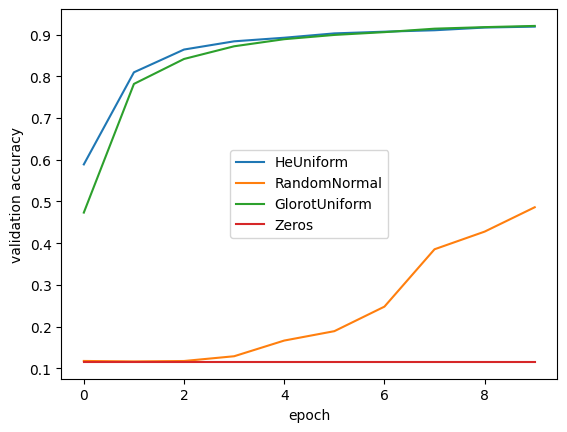

In [17]:
for i in [model_he, model_normal, model_uniform, model_zeros]:
    plt.plot(i.history.history['val_accuracy'], label=i.get_config()['layers'][1]['config']['kernel_initializer']['class_name'])

plt.legend()
plt.xlabel('epoch')
plt.ylabel('validation accuracy')

In [18]:
def simple_model_bn(initializer='he_uniform', activation='relu'):
    return tf.keras.Sequential([
        layers.Dense(32, activation, input_shape=(784,), kernel_initializer=initializer),
        layers.BatchNormalization(trainable=True, scale=True, center=True),
        layers.Dense(32, activation, kernel_initializer=initializer),
        layers.BatchNormalization(trainable=True, scale=True, center=True),
        layers.Dense(32, activation, kernel_initializer=initializer),
        layers.BatchNormalization(trainable=True, scale=True, center=True),
        layers.Dense(32, activation, kernel_initializer=initializer),
        layers.BatchNormalization(trainable=True, scale=True, center=True),
        layers.Dense(10, activation='softmax', kernel_initializer=tf.keras.initializers.glorot_normal())                
    ])

In [20]:
init = tf.initializers.random_normal()
activate = 'relu'
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1)
model_bn = simple_model(init, activate)
model_bn.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model_bn.fit(X_train, y_train, epochs=10, batch_size=3200, validation_data=(X_test, y_test))

Epoch 1/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.1131 - loss: 2.3025 - val_accuracy: 0.1529 - val_loss: 2.3021
Epoch 2/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.1507 - loss: 2.2994 - val_accuracy: 0.1616 - val_loss: 2.2991
Epoch 3/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.1608 - loss: 2.2959 - val_accuracy: 0.1913 - val_loss: 2.2945
Epoch 4/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.1964 - loss: 2.2899 - val_accuracy: 0.2451 - val_loss: 2.2855
Epoch 5/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2554 - loss: 2.2766 - val_accuracy: 0.2933 - val_loss: 2.2620
Epoch 6/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2841 - loss: 2.2370 - val_accuracy: 0.2860 - val_loss: 2.1809
Epoch 7/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.2864 - loss: 2.1225 - val_accuracy: 0.3512 - val_loss: 2.0675
Epoch 8/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3677 - loss: 1.9875 - val_accuracy: 0.4495 - v

In [21]:
init = tf.initializers.he_uniform()
activate = 'relu'
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1)
model_bn = simple_model(init, activate)
model_bn.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model_bn.fit(X_train, y_train, epochs=10, batch_size=3200, validation_data=(X_test, y_test))

Epoch 1/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.2747 - loss: 2.1272 - val_accuracy: 0.5870 - val_loss: 1.3234
Epoch 2/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6479 - loss: 1.1160 - val_accuracy: 0.7897 - val_loss: 0.8107
Epoch 3/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8058 - loss: 0.6480 - val_accuracy: 0.8507 - val_loss: 0.5990
Epoch 4/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8520 - loss: 0.4858 - val_accuracy: 0.8808 - val_loss: 0.5035
Epoch 5/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8788 - loss: 0.3994 - val_accuracy: 0.8961 - val_loss: 0.4483
Epoch 6/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8970 - loss: 0.3388 - val_accuracy: 0.9067 - val_loss: 0.4083
Epoch 7/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9072 - loss: 0.3063 - val_accuracy: 0.9115 - val_loss: 0.3829
Epoch 8/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9152 - loss: 0.2812 - val_accuracy: 0.9177 - v

In [22]:
init = tf.initializers.he_uniform()
activate = 'relu'
optimizer = tf.keras.optimizers.Adagrad(learning_rate=0.1)
model_bn_ada = simple_model(init, activate)
model_bn_ada.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model_bn_ada.fit(X_train, y_train, epochs=10, batch_size=3200, validation_data=(X_test, y_test))

Epoch 1/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.4863 - loss: 1.8202 - val_accuracy: 0.8691 - val_loss: 0.6035
Epoch 2/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8828 - loss: 0.4062 - val_accuracy: 0.9084 - val_loss: 0.4835
Epoch 3/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9159 - loss: 0.2863 - val_accuracy: 0.9129 - val_loss: 0.4630
Epoch 4/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9270 - loss: 0.2453 - val_accuracy: 0.9255 - val_loss: 0.4265
Epoch 5/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9429 - loss: 0.1996 - val_accuracy: 0.9310 - val_loss: 0.4333
Epoch 6/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9484 - loss: 0.1796 - val_accuracy: 0.9354 - val_loss: 0.4212
Epoch 7/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9512 - loss: 0.1661 - val_accuracy: 0.9364 - val_loss: 0.4427
Epoch 8/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9595 - loss: 0.1403 - val_accuracy: 0.9375 - v

In [23]:
init = tf.initializers.he_uniform()
activate = 'relu'
optimizer = tf.keras.optimizers.Adam(learning_rate=0.1)
model_bn_ada = simple_model(init, activate)
model_bn_ada.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model_bn_ada.fit(X_train, y_train, epochs=10, batch_size=3200, validation_data=(X_test, y_test))

Epoch 1/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 105ms/step - accuracy: 0.1530 - loss: 4.5621 - val_accuracy: 0.2076 - val_loss: 2.0254
Epoch 2/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2162 - loss: 2.0160 - val_accuracy: 0.2477 - val_loss: 1.9119
Epoch 3/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2654 - loss: 1.8827 - val_accuracy: 0.3243 - val_loss: 1.7921
Epoch 4/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2965 - loss: 1.8551 - val_accuracy: 0.3351 - val_loss: 1.7334
Epoch 5/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3437 - loss: 1.7020 - val_accuracy: 0.3831 - val_loss: 1.5905
Epoch 6/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3986 - loss: 1.6060 - val_accuracy: 0.4312 - val_loss: 1.4884
Epoch 7/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4671 - loss: 1.3959 - val_accuracy: 0.5149 - val_loss: 1.1917
Epoch 8/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5199 - loss: 1.1670 - val_accuracy: 0.5394 - 

In [25]:
init = tf.initializers.he_uniform()
activate = 'relu'
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model_bn_ada = simple_model(init, activate)
model_bn_ada.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model_bn_ada.fit(X_train, y_train, epochs=10, batch_size=3200, validation_data=(X_test, y_test))

Epoch 1/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.2636 - loss: 2.1720 - val_accuracy: 0.6107 - val_loss: 1.4609
Epoch 2/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6553 - loss: 1.2276 - val_accuracy: 0.8085 - val_loss: 0.7348
Epoch 3/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8203 - loss: 0.6222 - val_accuracy: 0.8797 - val_loss: 0.4822
Epoch 4/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8855 - loss: 0.3990 - val_accuracy: 0.9066 - val_loss: 0.4094
Epoch 5/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9106 - loss: 0.3094 - val_accuracy: 0.9181 - val_loss: 0.3797
Epoch 6/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9308 - loss: 0.2450 - val_accuracy: 0.9268 - val_loss: 0.3530
Epoch 7/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9391 - loss: 0.2113 - val_accuracy: 0.9292 - val_loss: 0.3215
Epoch 8/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9461 - loss: 0.1848 - val_accuracy: 0.9321 - v

In [26]:
from tensorflow.keras.callbacks import EarlyStopping

In [27]:
init = tf.keras.initializers.he_uniform()
activate = 'relu'

optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
model_bn_adam = simple_model_bn(init, activate)
model_bn_adam.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss', mode='min', patience=10, restore_best_weights=True, verbose=1)

history = model_bn_adam.fit(X_train, y_train, epochs=2000, callbacks=[es], validation_data=(X_test, y_test), verbose=1)

_, train_acc = model_bn_adam.evaluate(X_train, y_train, verbose=0)
_, test_acc = model_bn_adam.evaluate(X_train, y_train, verbose=0)
print('Train Acc:', train_acc, 'Test Acc:', test_acc)

Epoch 1/2000
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8457 - loss: 0.5057 - val_accuracy: 0.9404 - val_loss: 0.2387
Epoch 2/2000
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9391 - loss: 0.2014 - val_accuracy: 0.9481 - val_loss: 0.2051
Epoch 3/2000
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9527 - loss: 0.1588 - val_accuracy: 0.9517 - val_loss: 0.1775
Epoch 4/2000
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9587 - loss: 0.1393 - val_accuracy: 0.9574 - val_loss: 0.1645
Epoch 5/2000
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9637 - loss: 0.1234 - val_accuracy: 0.9571 - val_loss: 0.2438
Epoch 6/2000
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9653 - loss: 0.1087 - val_accuracy: 0.9601 - val_loss: 0.2307
Epoch 7/2000
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9682 - loss: 0.1041 - val_accuracy: 0.9609 - val_loss: 0.1637
Epoch 8/2000
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9728 